In [36]:
!git clone https://github.com/mjay9482/New_track

fatal: destination path 'New_track' already exists and is not an empty directory.


In [37]:
!ls New_track

driving_log.csv  IMG


In [39]:
import os
import ntpath
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import Image
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

from imgaug import augmenters as iaa
import cv2
import random

In [40]:
%matplotlib inline

In [41]:
np.random.seed(0)

In [42]:
datadir = 'New_track'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir,'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth',None)
data.head()

center  \
0  /home/mrityunjay/Desktop/Data_new/IMG/center_2024_09_16_23_22_40_755.jpg   
1  /home/mrityunjay/Desktop/Data_new/IMG/center_2024_09_16_23_22_40_855.jpg   
2  /home/mrityunjay/Desktop/Data_new/IMG/center_2024_09_16_23_22_40_956.jpg   
3  /home/mrityunjay/Desktop/Data_new/IMG/center_2024_09_16_23_22_41_057.jpg   
4  /home/mrityunjay/Desktop/Data_new/IMG/center_2024_09_16_23_22_41_158.jpg   

                                                                      left  \
0   /home/mrityunjay/Desktop/Data_new/IMG/left_2024_09_16_23_22_40_755.jpg   
1   /home/mrityunjay/Desktop/Data_new/IMG/left_2024_09_16_23_22_40_855.jpg   
2   /home/mrityunjay/Desktop/Data_new/IMG/left_2024_09_16_23_22_40_956.jpg   
3   /home/mrityunjay/Desktop/Data_new/IMG/left_2024_09_16_23_22_41_057.jpg   
4   /home/mrityunjay/Desktop/Data_new/IMG/left_2024_09_16_23_22_41_158.jpg   

                                                                      right  \
0   /home/mrityunjay/Desktop/Data_new/IMG/right_2024_09_16_23_22_40_755.jpg   
1   /home/mrityunjay/Desktop/Data_new/IMG/right_2024_09_16_23_22_40_855.jpg   
2   /home/mrityunjay/Desktop/Data_new/IMG/right_2024_09_16_23_22_40_956.jpg   
3   /home/mrityunjay/Desktop/Data_new/IMG/right_2024_09_16_23_22_41_057.jpg   
4   /home/mrityunjay/Desktop/Data_new/IMG/right_2024_09_16_23_22_41_158.jpg   

   steering  throttle  reverse     speed  
0       0.0       0.0      0.0  0.000078  
1       0.0       0.0      0.0  0.000078  
2       0.0       0.0      0.0  0.000079  
3       0.0       0.0      0.0  0.000078  
4       0.0       0.0      0.0  0.000079

In [43]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail

data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

center                              left  \
0  center_2024_09_16_23_22_40_755.jpg  left_2024_09_16_23_22_40_755.jpg   
1  center_2024_09_16_23_22_40_855.jpg  left_2024_09_16_23_22_40_855.jpg   
2  center_2024_09_16_23_22_40_956.jpg  left_2024_09_16_23_22_40_956.jpg   
3  center_2024_09_16_23_22_41_057.jpg  left_2024_09_16_23_22_41_057.jpg   
4  center_2024_09_16_23_22_41_158.jpg  left_2024_09_16_23_22_41_158.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2024_09_16_23_22_40_755.jpg       0.0       0.0      0.0  0.000078  
1  right_2024_09_16_23_22_40_855.jpg       0.0       0.0      0.0  0.000078  
2  right_2024_09_16_23_22_40_956.jpg       0.0       0.0      0.0  0.000079  
3  right_2024_09_16_23_22_41_057.jpg       0.0       0.0      0.0  0.000078  
4  right_2024_09_16_23_22_41_158.jpg       0.0       0.0      0.0  0.000079

In [44]:
data['speed'] = data['speed'] * 1e4

In [45]:
data.head()

center                              left  \
0  center_2024_09_16_23_22_40_755.jpg  left_2024_09_16_23_22_40_755.jpg   
1  center_2024_09_16_23_22_40_855.jpg  left_2024_09_16_23_22_40_855.jpg   
2  center_2024_09_16_23_22_40_956.jpg  left_2024_09_16_23_22_40_956.jpg   
3  center_2024_09_16_23_22_41_057.jpg  left_2024_09_16_23_22_41_057.jpg   
4  center_2024_09_16_23_22_41_158.jpg  left_2024_09_16_23_22_41_158.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2024_09_16_23_22_40_755.jpg       0.0       0.0      0.0  0.779523  
1  right_2024_09_16_23_22_40_855.jpg       0.0       0.0      0.0  0.777276  
2  right_2024_09_16_23_22_40_956.jpg       0.0       0.0      0.0  0.789555  
3  right_2024_09_16_23_22_41_057.jpg       0.0       0.0      0.0  0.779120  
4  right_2024_09_16_23_22_41_158.jpg       0.0       0.0      0.0  0.786120

In [46]:
num_of_bins = 25
samples_per_bin = 200
bin_edges = np.linspace(-1, 1, num_of_bins + 1)
hist, bins = np.histogram(data['steering'], bins=bin_edges)

center = (bins[:-1] + bins[1:]) / 2

fig = go.Figure(data=[go.Bar(x=center, y=hist, width=(bins[1] - bins[0]), marker_color='navy', marker_line_color='white')])

fig.update_layout(
    title='Zero-Centered Steering Histogram',
    xaxis_title='Steering Angle',
    yaxis_title='Count',
    xaxis=dict(
        tickvals=center,
        ticktext=[f'{c:.2f}' for c in center]
    ),
    plot_bgcolor='white'
)
fig.show()

In [47]:
num_of_bins = 25
sample_per_bin = 200

bin_edges = np.linspace(-1, 1, num_of_bins + 1)
hist, bins = np.histogram(data['steering'], bins=bin_edges)

center = (bins[:-1] + bins[1:]) / 2

fig = go.Figure()

fig.add_trace(go.Bar(
    x=center,
    y=hist,
    width=(bins[1] - bins[0]),
    marker_color='navy',
    marker_line_color='white',
    opacity=0.7,
    name='Histogram'
))

fig.add_trace(go.Scatter(
    x=[np.min(data['steering']), np.max(data['steering'])],
    y=[sample_per_bin, sample_per_bin],
    mode='lines',
    line=dict(color='blue', width=2),
    name='Sample Line'
))

fig.update_layout(
    title='Zero-Centered Steering Histogram',
    xaxis_title='Steering Angle',
    yaxis_title='Count',
    plot_bgcolor='white',
    xaxis=dict(
        tickvals=center,
        ticktext=[f'{c:.2f}' for c in center]
    )
)
fig.show()

In [48]:
print(f"Total data: {len(data)}")
bin_edges = np.linspace(-1, 1, num_of_bins + 1)
bin_indices = np.digitize(data['steering'], bins=bin_edges, right=True)
remove_indices = []
for j in range(num_of_bins):
    current_bin_indices = np.where(bin_indices == j + 1)[0]
    np.random.shuffle(current_bin_indices)
    indices_to_remove = current_bin_indices[sample_per_bin:]
    remove_indices.extend(indices_to_remove)

print(f'Removed: {len(remove_indices)}')

data.drop(index=remove_indices, inplace=True)

print(f'Remaining: {len(data)}')
hist, _ = np.histogram(data['steering'],(num_of_bins))

fig = go.Figure()

fig.add_trace(go.Bar(
    x=center,
    y=hist,
    width=(bins[1] - bins[0]),
    marker_color='navy',
    marker_line_color='white',
    opacity=0.7,
    name='Histogram'
))

fig.add_trace(go.Scatter(
    x=[np.min(data['steering']), np.max(data['steering'])],
    y=[sample_per_bin, sample_per_bin],
    mode='lines',
    line=dict(color='blue', width=2),
    name='Sample Line'
))

fig.update_layout(
    title='Zero-Centered Steering Histogram',
    xaxis_title='Steering Angle',
    yaxis_title='Count',
    xaxis=dict(
        tickvals=center,
        ticktext=[f'{c:.2f}' for c in center]
    ),
    plot_bgcolor='white'
)
fig.show()

Total data: 3650
Removed: 2419
Remaining: 1231


In [49]:
print(data.iloc[1])
def load_img_steering(datadir, df):
    image_path = []
    steering = []

    for i in range(len(df)):
        row = df.iloc[i]
        center_img = row['center'].strip()
        steering_value = float(row['steering'])
        image_path.append(os.path.join(datadir, center_img))
        steering.append(steering_value)

    image_paths = np.array(image_path)
    steerings = np.array(steering)

    return image_paths, steerings

image_paths, steerings  = load_img_steering(datadir + '/IMG', data)

center      center_2024_09_16_23_22_41_762.jpg
left          left_2024_09_16_23_22_41_762.jpg
right        right_2024_09_16_23_22_41_762.jpg
steering                                   0.0
throttle                                   0.0
reverse                                    0.0
speed                                 0.778532
Name: 10, dtype: object


In [50]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size = 0.2, random_state = 6)

In [51]:
print(f'Training samples: {X_train.shape} \n Valid Samples: {X_valid.shape}')

Training samples: (984,) 
 Valid Samples: (247,)


In [52]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('Training Set', 'Validation Set'))

bin_edges = np.linspace(min(np.min(y_train), np.min(y_valid)), max(np.max(y_train), np.max(y_valid)), num=num_of_bins+1)

fig.add_trace(
    go.Histogram(
        x=y_train,
        histnorm='',
        name='Training Set',
        marker_color='navy',
        xbins=dict(start=bin_edges[0], end=bin_edges[-1], size=(bin_edges[1] - bin_edges[0])),
        autobinx = False
    ),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(
        x=y_valid,
        histnorm='',
        name='Validation Set',
        marker_color='red',
        xbins=dict(start=bin_edges[0], end=bin_edges[-1], size=(bin_edges[1] - bin_edges[0])),
        autobinx = False
    ),
    row=1, col=2
)

fig.update_layout(
    title_text='Histograms of Training and Validation Sets',
    xaxis_title='Value',
    xaxis2_title='Value',
    xaxis=dict(title='Training Set'),
    xaxis2=dict(title='Validation Set'),
    barmode='overlay',
    bargap=0.1,
    bargroupgap=0.1,
    plot_bgcolor='white'
)

# Show the interactive plot
fig.show()

In [53]:
def zoom(img):
  img = iaa.Affine(scale = (1,1.3)).augment_image(img)
  return img

Text(0.5, 1.0, 'Zoomed Image')

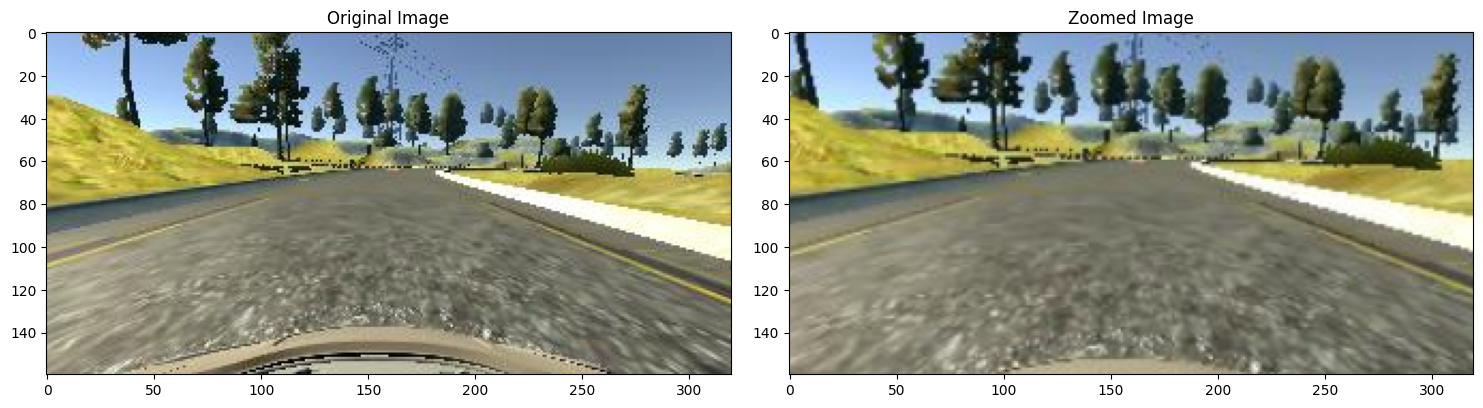

In [54]:
img = image_paths[random.randint(0,len(X_train)-1)]
original_image = mpimg.imread(img)
zoomed_image = zoom(original_image)

fig, axes = plt.subplots(1,2,figsize = (15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[1].imshow(zoomed_image)
axes[1].set_title('Zoomed Image')

In [55]:
def pan(img):
  img = iaa.Affine(translate_percent = {'x':(-0.1, 0.1), 'y':(-0.1, 0.1)}).augment_image(img)
  return img

Text(0.5, 1.0, 'Panned Image')

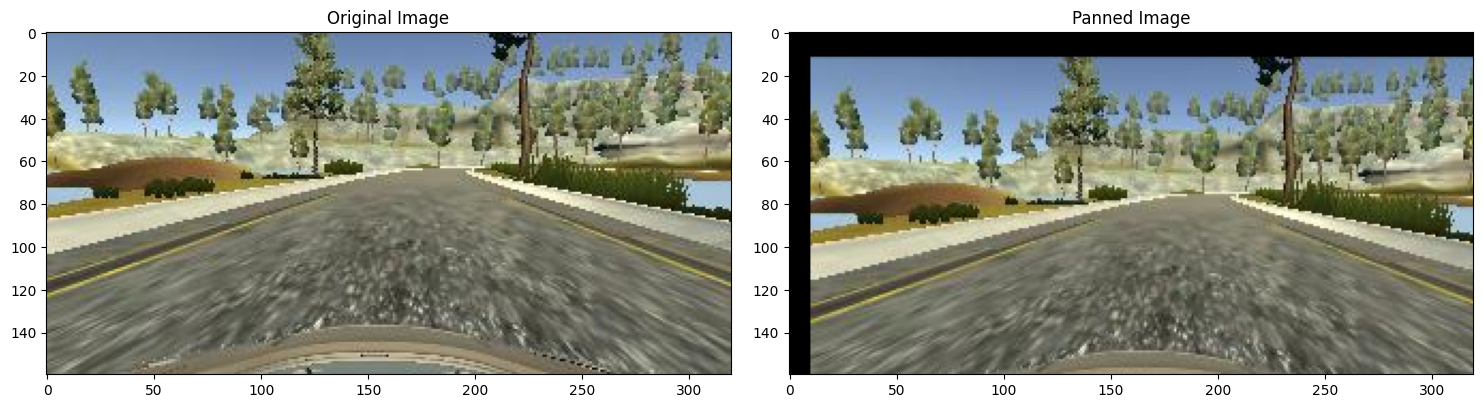

In [56]:
img = image_paths[random.randint(0,len(X_train)-1)]
original_image = mpimg.imread(img)
panned_image = pan(original_image)

fig, axes = plt.subplots(1,2,figsize = (15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[1].imshow(panned_image)
axes[1].set_title('Panned Image')

In [57]:
def img_random_brightness(img):
    seq = iaa.Multiply((0.2, 1.2))
    img_aug = seq.augment_image(img)
    return img_aug

Text(0.5, 1.0, 'Bright Image')

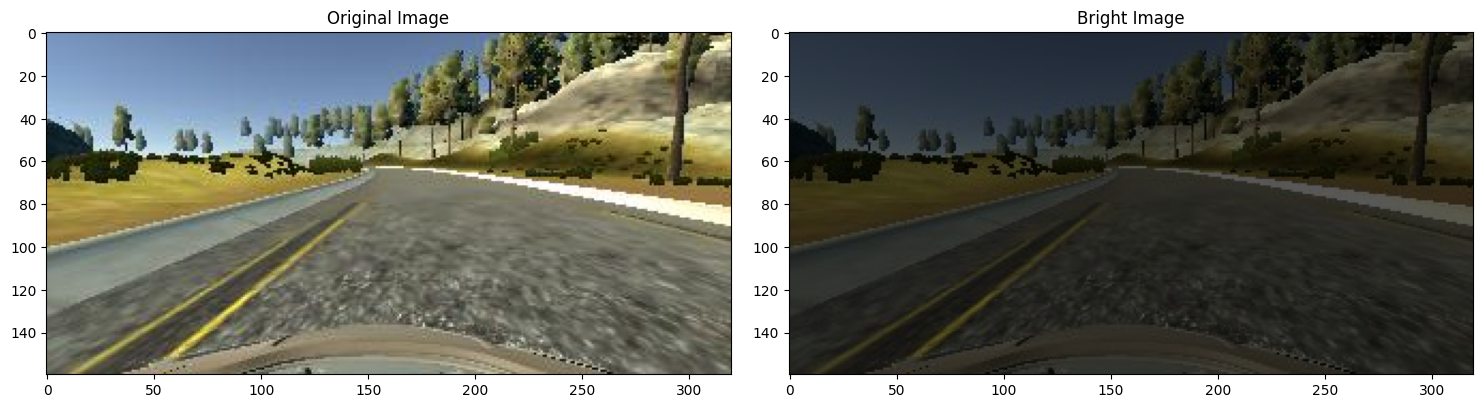

In [58]:
img = image_paths[random.randint(0,len(X_train)-1)]
original_image = mpimg.imread(img)
bright_image = img_random_brightness(original_image)

fig, axes = plt.subplots(1,2,figsize = (15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[1].imshow(bright_image)
axes[1].set_title('Bright Image')

In [59]:
def img_random_flip(img, steering_angle):
  img = cv2.flip(img, 1)
  steering_angle = -steering_angle
  return img, steering_angle

Text(0.5, 1.0, 'Flipped Image - steering angle -1.0')

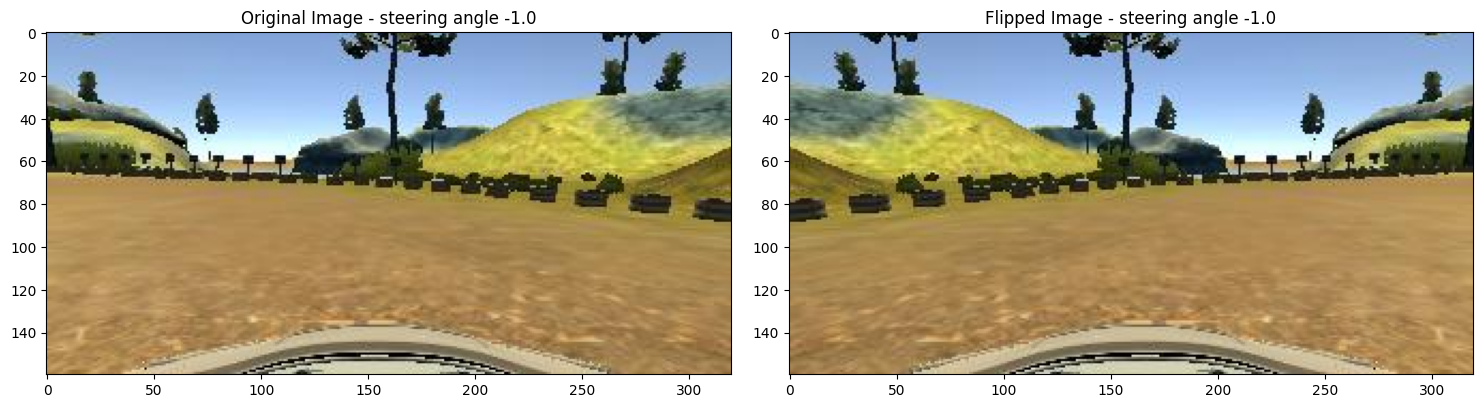

In [60]:
random_index = random.randint(0,len(X_train)-1)
steering_angle = steerings[random_index]
img = image_paths[random_index]

original_image = mpimg.imread(img)
flipped_image, _ = img_random_flip(original_image, steering_angle)

fig, axes = plt.subplots(1,2,figsize = (15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('Original Image - ' + 'steering angle ' + str(steering_angle))
axes[1].imshow(flipped_image)
axes[1].set_title('Flipped Image - ' + 'steering angle ' + str(steering_angle))

In [61]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
        image = pan(image)
    if np.random.rand() < 0.5:
        image = zoom(image)
    if np.random.rand() < 0.5:
        image = img_random_brightness(image)
    if np.random.rand() < 0.5:
        image, steering_angle = img_random_flip(image, steering_angle)
    return image, steering_angle


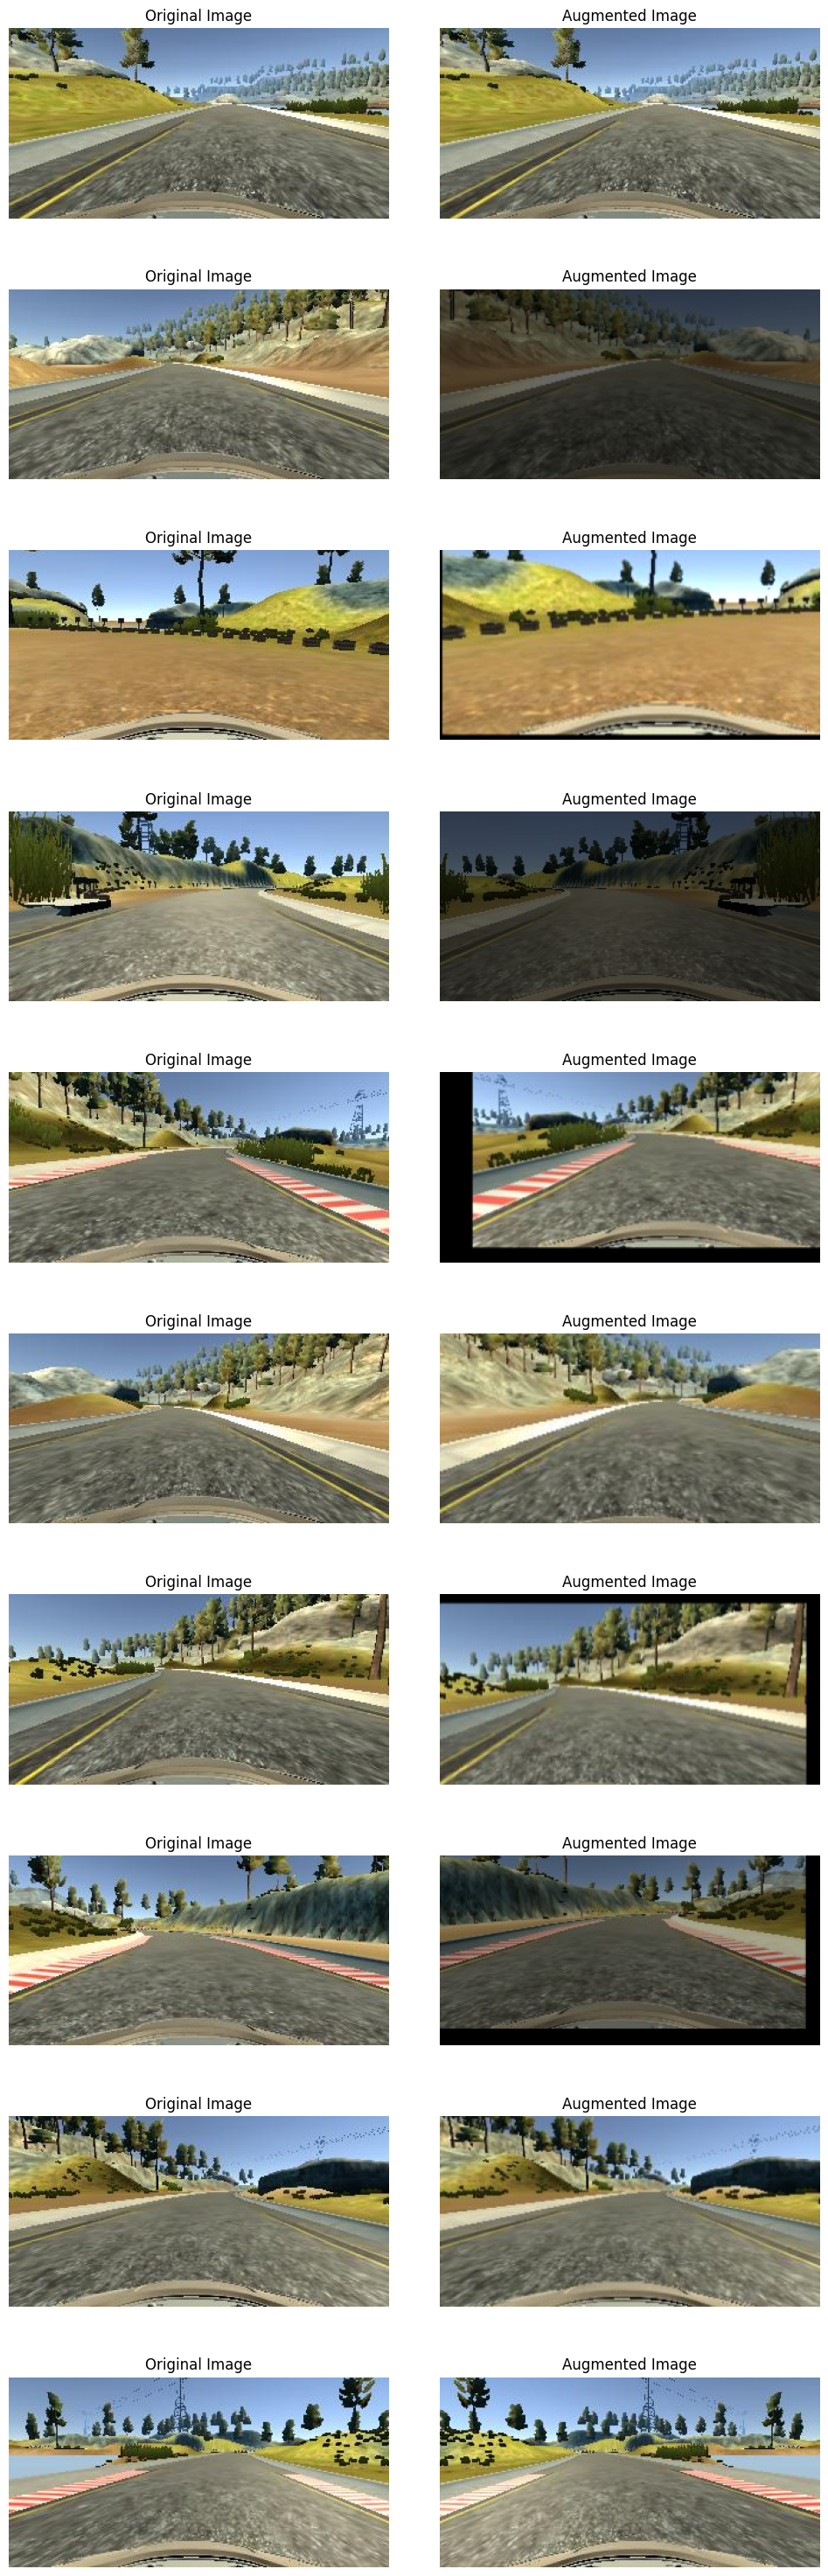

In [62]:
ncol = 2
nrow = 10

fig, axes = plt.subplots(nrow, ncol, figsize=(10, 30))
fig.subplots_adjust(hspace=0.3, wspace=0.1)
fig.tight_layout()
for i in range(nrow):
    random_index = random.randint(0, len(X_train) - 1)
    random_img = image_paths[random_index]
    random_steering = steerings[random_index]
    original_image = mpimg.imread(random_img)
    augmented_image, steering = random_augment(random_img, random_steering)
    axes[i][0].imshow(original_image)
    axes[i][0].set_title('Original Image')
    axes[i][0].axis('off')
    axes[i][1].imshow(augmented_image)
    axes[i][1].set_title('Augmented Image')
    axes[i][1].axis('off')

plt.show()

In [63]:
def img_processing(img):
  img = img[60:135, :, :]
  img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img,(3,3),0)
  img = cv2.resize(img, (200, 66))
  img = img / 255
  return img

Text(0.5, 1.0, 'Preprocessed Image')

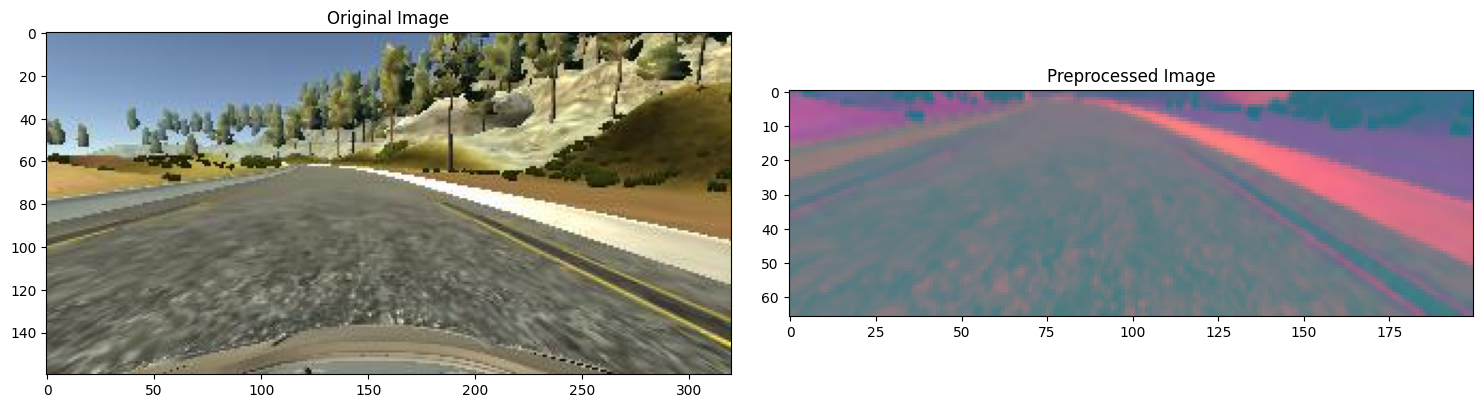

In [64]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_processing(original_image)
fig, axes = plt.subplots(1, 2, figsize = (15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[1].imshow(preprocessed_image)
axes[1].set_title('Preprocessed Image')

In [65]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
  while True:
    batch_img = []
    batch_steering = []

    for i in range(batch_size):
      random_index  = random.randint(0, len(image_paths)-1)

      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]
      im = img_processing(im)
      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))

Text(0.5, 1.0, 'Validation Image')

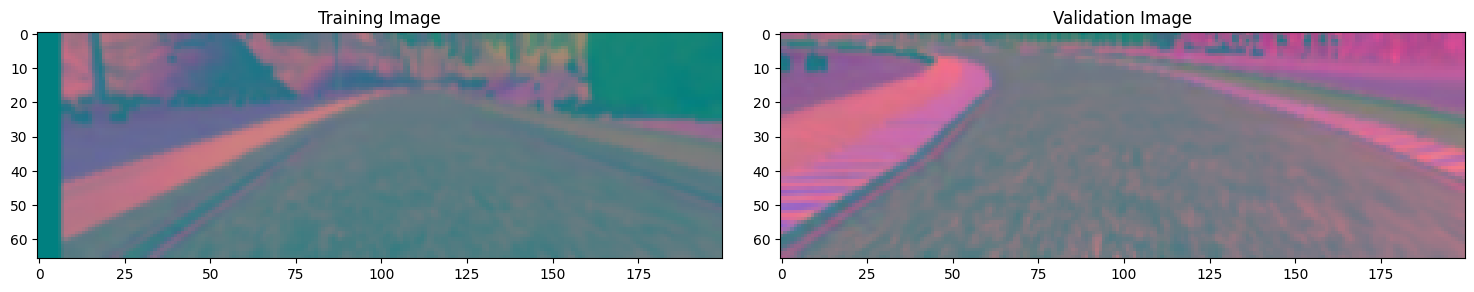

In [66]:
X_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
X_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))

fig, axes = plt.subplots(1,2,figsize = (15,10))
fig.tight_layout()
axes[0].imshow(X_train_gen[0])
axes[0].set_title('Training Image')
axes[1].imshow(X_valid_gen[0])
axes[1].set_title('Validation Image')

In [67]:
def nvidia_model():
    model = Sequential([
        BatchNormalization(input_shape=(66, 200, 3)),

        Conv2D(24, (5, 5), strides=(2, 2), activation='elu'),
        BatchNormalization(),

        Conv2D(36, (5, 5), strides=(2, 2), activation='elu'),
        BatchNormalization(),

        Conv2D(48, (5, 5), strides=(2, 2), activation='elu'),
        BatchNormalization(),

        Conv2D(64, (3, 3), activation='elu'),
        BatchNormalization(),

        Conv2D(64, (3, 3), activation='elu'),
        BatchNormalization(),

        Flatten(),

        Dense(100, activation='elu'),
        Dropout(0.5),
        BatchNormalization(),

        Dense(50, activation='elu'),
        Dropout(0.3),
        BatchNormalization(),

        Dense(10, activation='elu'),
        Dropout(0.2),

        Dense(1)
    ])
    return model

In [68]:
model = nvidia_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 66, 200, 3)        12        
 Normalization)                                                  
                                                                 
 conv2d_5 (Conv2D)           (None, 31, 98, 24)        1824      
                                                                 
 batch_normalization_1 (Bat  (None, 31, 98, 24)        96        
 chNormalization)                                                
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 batch_normalization_2 (Bat  (None, 14, 47, 36)        144       
 chNormalization)                                                
                                                      

In [69]:
optimizer = Adam(learning_rate = 0.001)
model.compile(
    optimizer=optimizer,
    loss='huber',
    metrics=['mae']
)
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3,
        min_lr=1e-6
    )
]
# Training configuration
training_config = {
    'batch_size': 32,
    'epochs': 50,
    'validation_split': 0.2,
    'shuffle': True,
    'callbacks': callbacks
}

In [71]:
history = model.fit(batch_generator(X_train, y_train, 100, 1),
                              steps_per_epoch = 300,
                              epochs = 10,
                              validation_data = batch_generator(X_valid, y_valid, 100, 1),
                              validation_steps = 200, verbose = 1, shuffle = 1)

Epoch 1/10
300/300 [==============================] - 500s 2s/step - loss: 0.2403 - mae: 0.5415 - val_loss: 0.0886 - val_mae: 0.3087
Epoch 2/10
300/300 [==============================] - 464s 2s/step - loss: 0.0997 - mae: 0.3336 - val_loss: 0.0659 - val_mae: 0.2639
Epoch 3/10
300/300 [==============================] - 463s 2s/step - loss: 0.0730 - mae: 0.2833 - val_loss: 0.0605 - val_mae: 0.2510
Epoch 4/10
300/300 [==============================] - 456s 2s/step - loss: 0.0583 - mae: 0.2545 - val_loss: 0.0503 - val_mae: 0.2389
Epoch 5/10
300/300 [==============================] - 403s 1s/step - loss: 0.0487 - mae: 0.2323 - val_loss: 0.0476 - val_mae: 0.2292
Epoch 6/10
300/300 [==============================] - 459s 2s/step - loss: 0.0421 - mae: 0.2187 - val_loss: 0.0378 - val_mae: 0.2105
Epoch 7/10
300/300 [==============================] - 461s 2s/step - loss: 0.0384 - mae: 0.2086 - val_loss: 0.0403 - val_mae: 0.2169
Epoch 8/10
300/300 [==============================] - 459s 2s/step - 

In [72]:
model.save('model.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [76]:
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [75]:
def plot_loss(history):
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=list(range(1, len(history.history['loss']) + 1)),
                             y=history.history['loss'],
                             mode='lines',
                             name='Training loss',
                             line=dict(color='navy')))

    fig.add_trace(go.Scatter(x=list(range(1, len(history.history['val_loss']) + 1)),
                             y=history.history['val_loss'],
                             mode='lines',
                             name='Validation loss',
                             line=dict(color='red')))

    fig.update_layout(title='Loss',
                      xaxis_title='Epochs',
                      yaxis_title='Loss',
                      legend=dict(x=0.02, y=0.98, bgcolor='rgba(255,255,255,0)'),
                      width=800,
                      height=400)

    fig.show()
plot_loss(history)

In [ ]:
# Extract metrics
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(loss) + 1)

# Plotting Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Huber Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting MAE
plt.subplot(1, 2, 2)
plt.plot(epochs, mae, 'bo-', label='Training MAE')
plt.plot(epochs, val_mae, 'ro-', label='Validation MAE')
plt.title('MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()